In [1]:
import pandas as pd
import numpy as np

## Modelos Puerto de Newark:

In [ ]:
newark_data = pd.read_csv('../sources/newark_data.csv')

In [ ]:
from plotnine import ggplot, aes, geom_line, labs
from sklearn.preprocessing import MinMaxScaler

# Select the columns to plot
columns_to_plot = ['Sum_of_Counts', 'Total Imports']

# Apply MinMaxScaler to the selected columns
scaler = MinMaxScaler()
newark_data_scaled = newark_data.copy()
newark_data_scaled[columns_to_plot] = scaler.fit_transform(newark_data[columns_to_plot])

# Melt the dataframe for plotting
newark_data_melted = newark_data_scaled.melt(id_vars=['Date'], value_vars=columns_to_plot, var_name='Variable', value_name='Value')

# Convert 'Date' to datetime
newark_data_melted['Date'] = pd.to_datetime(newark_data_melted['Date'])

# Plot using plotnine
plot = (ggplot(newark_data_melted, aes(x='Date', y='Value', color='Variable'))
    + geom_line()
    + labs(title='Scaled Values of Sum_of_Counts, Loaded Imports, Total Imports, and Total TEUs',
           x='Date', y='Scaled Value'))

plot

In [ ]:
newark_data_input = newark_data.loc[:,['Date','Empty Exports','Loaded Exports','Empty Imports','Loaded Imports','Total TEUs', 'Total Imports', 'Total Exports','Ratio_Cocaine']]
newark_data_input_corr = newark_data_input[['Empty Exports','Loaded Exports','Empty Imports','Loaded Imports','Total TEUs', 'Total Imports', 'Total Exports','Ratio_Cocaine']]

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = newark_data_input_corr.corr().abs()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Newark Data Input')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor


In [ ]:

X = newark_data_input.drop('Ratio_Cocaine', axis=1)
y = newark_data_input['Ratio_Cocaine']

# Opcion A: Division como train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the training data
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training MSE: {train_mse}')
print(f'Training R2: {train_r2}')

# Predict on the test data
y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}')
print(f'Test R2: {test_r2}')

In [ ]:
# Define the features and target variable
X_filtered = newark_data_input.drop(['Date', 'Ratio_Cocaine'], axis=1)
y_filtered = newark_data_input['Ratio_Cocaine']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the RandomForestRegressor
rf_regressor_ts = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
for train_index, test_index in tscv.split(X_filtered):
    X_train_ts, X_test_ts = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
    y_train_ts, y_test_ts = y_filtered.iloc[train_index], y_filtered.iloc[test_index]
    
    # Fit the model
    rf_regressor_ts.fit(X_train_ts, y_train_ts)
    
    # Predict on the test data
    y_test_pred_ts = rf_regressor_ts.predict(X_test_ts)
    
    # Evaluate the model
    test_mse_ts = mean_squared_error(y_test_ts, y_test_pred_ts)
    test_r2_ts = r2_score(y_test_ts, y_test_pred_ts)
    
    print(f'Test MSE: {test_mse_ts}')
    print(f'Test R2: {test_r2_ts}')

## Modelos Puerto de Everglades:

In [2]:
everglades_data = pd.read_csv('../sources/everglades_data.csv')

In [3]:
everglades_data_input = everglades_data.loc[:,['Date','Empty Exports','Loaded Exports','Empty Imports','Loaded Imports','Total TEUs', 'Total Imports', 'Total Exports','Sum_of_Counts']]
everglades_data_input_corr = everglades_data_input[['Empty Exports','Loaded Exports','Empty Imports','Loaded Imports','Total TEUs', 'Total Imports', 'Total Exports','Sum_of_Counts']]

/home/gonzalopc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


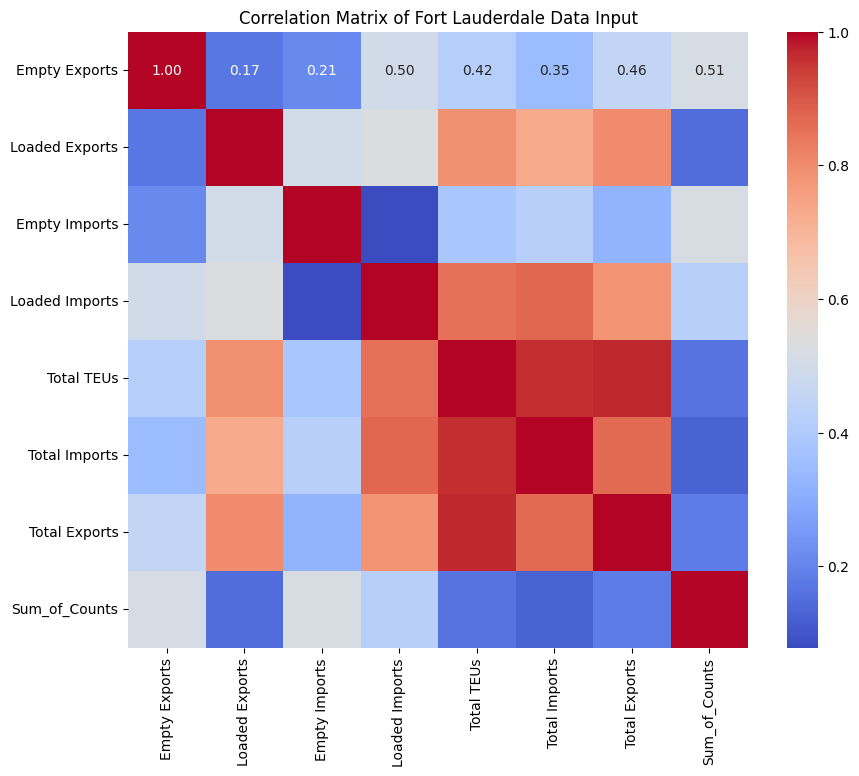

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = everglades_data_input_corr.corr().abs()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Fort Lauderdale Data Input')
plt.show()

In [ ]:
# Use last year for test

# Convert 'Date' to datetime
everglades_data_input['Date'] = pd.to_datetime(everglades_data_input['Date'])

# Split the data
train_data = everglades_data_input[everglades_data_input['Date'] < '2024-01-01']
test_data = everglades_data_input[everglades_data_input['Date'] >= '2024-01-01']

In [ ]:
# Define the features and target variable for train_data
X_train = train_data.drop('Sum_of_Counts', axis=1)
y_train = train_data['Sum_of_Counts']

# Define the features and target variable for test_data
X_test = test_data.drop('Sum_of_Counts', axis=1)
y_test = test_data['Sum_of_Counts']

In [13]:
regressors = {
    'LR', LinearRegression(),
    'adaBoostRegressor', AdaBoostRegressor(random_state=256),
    'baggingRegressor', BaggingRegressor(random_state=256),
    'GBR', GradientBoostingRegressor(random_state=256)
}

params = {
    'LR':{
        'fit_intercept':[True, False]
    },
    'adaBoostRegressor':{
        'n_estimators':[2,4,8,16,32,64],
        'learning_rate':[1e-3, 1e-2, 1e-1, 1, 10, 1e2],
        'loss':['linear','square']
    },
    'baggingRegressor':{
        'n_estimators':[2,4,8,16,32,64],
        'max_samples':[5,10,25,40],
        'max_features':[1,2,3]
    },
    'GBR':{
        'loss':['linear','square'],
        'learning_rate':[1e-3, 1e-2, 1e-1, 1, 10, 1e2],
        'n_estimators':[2,4,8,16,32,64],
        'validation_fraction':[0.05, 0.1, 0.2], # subconjunto de validacion
        'n_iter_no_change':[2,3, 5, 10], # tras varias iteraciones loss function no mejora, fin del entrenamiento
        'tol':[1e-4, 1e-3, 1e-2, 1e-1], # una tolerancia al decrecimiento
    }
}


In [ ]:
regressorsCV = {}

for name in list(params.keys()):
    print("*************")
    print(name)
    print("*************")
    regressorsCV[name] = GridSearchCV(
        estimator=regressors[name],
        param_grid=params[name],
        scoring=['mean_squared_error','r2_score'],
        return_train_score=True,
        n_jobs=-1,
        cv=5, verbose = 2
    )

    regressorsCV[name].fit(X_train, y_train)

In [ ]:
# compute results
test_scores = []


for name in list(params.keys()):
    print(name)
    print("Número de configuraciones: ", pd.DataFrame.from_dict(regressorsCV[name].cv_results_).shape[0])
    aux = pd.DataFrame.from_dict(regressorsCV[name].cv_results_).sort_values(by="mean_test_score",ascending=False).iloc[0]

    # Accuracy
    mse_cv_test = aux['mean_test_score']
    mse_cv_train = aux['mean_train_score']

    mse_train = mean_squared_error(y_train, regressorsCV[name].predict(X_train))
    mse_test = mean_squared_error(y_test, regressorsCV[name].predict(X_test))

    # R2:
    r2_train = r2_score(y_train, regressorsCV[name].predict(X_train))
    r2_test = r2_score(y_test, regressorsCV[name].predict(X_test))
      
    test_scores.append((name,mse_train,mse_cv_train,mse_cv_test,mse_test,r2_train,r2_test))
    
# mirar el rendimiento en validacion para obtener el mejor modelo
resultado = pd.DataFrame(test_scores,columns=['Regressor','mse_train','mse_CV_train','mse_validation','mse_test','r2_train','r2_test'])
sorted_resultado = resultado.sort_values(by="mse_validation",ascending=False)

In [ ]:
sorted_resultado

## Modelo de series temporales

In [ ]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [ ]:
everglades_data

Serie temporal para Loaded Imports en Miami/Fort Lauderdale:

In [ ]:
df_imports = everglades_data[['Date', 'Loaded Imports']]

In [ ]:
df_imports['Date'] = pd.to_datetime(df_imports['Date'])
df_imports_train = df_imports[df_imports['Date'] < '2024-01-01']
df_imports_test = df_imports[df_imports['Date'] >= '2024-01-01']

df_imports_train = df_imports_train.rename(columns={'Date': 'ds', 'Loaded Imports': 'y'})
df_imports_test = df_imports_test.rename(columns={'Date': 'ds', 'Loaded Imports': 'y'})
print(df_imports_train)

In [ ]:
# df_imports_train['cap'] = 0.5
m = Prophet()
m.fit(df_imports_train)

In [ ]:
prediction = m.predict(df_imports_test)
print(prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [ ]:
# Plot the forecast
fig = m.plot(prediction)
ax = fig.gca()

# Plot the actual values
ax.plot(df_imports_test['ds'], df_imports_test['y'], 'r.', label='Actual')

# Customize the plot
plt.legend()
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Loaded Imports')
plt.show()

In [ ]:

# Plot the forecast
fig = m.plot(prediction)
ax = fig.gca()

# Plot the actual values
ax.plot(df_imports_test['ds'], df_imports_test['y'], 'r.', label='Actual')
a = add_changepoints_to_plot(fig.gca(), m, prediction)

# Customize the plot
plt.legend()
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Loaded Imports')
plt.show()

In [ ]:
m = Prophet(changepoints=['2020-05-01','2022-03-01','2023-04-01']) # ,'2022-03-01','2023-04-01'
forecast = m.fit(df_imports_train).predict(df_imports_test)
fig = m.plot(forecast)
ax = fig.gca()

# Plot the actual values
ax.plot(df_imports_test['ds'], df_imports_test['y'], 'r.', label='Actual')
# a = add_changepoints_to_plot(fig.gca(), m, prediction)

# Customize the plot
plt.legend()
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Loaded Imports')
plt.show()

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, prediction)